In [9]:
# %% init
from random import randint
import matplotlib
import numpy
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Activation, Dense
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler

(672, 182)


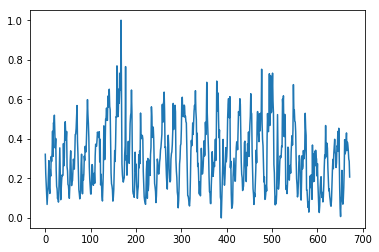

In [2]:
# %% load dataset: 182 base stations, 4 weeks, hourly traffic
feature_size = 182
time_steps = 24
dataset = numpy.fromfile(open('../data/traffic.bin', 'rb'),
                         dtype=numpy.float64).reshape(feature_size, time_steps * 7 * 4)
dataset = dataset.transpose()
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print dataset.shape
pyplot.plot(dataset[:, 7])
pyplot.show()

(504,) (168,)
(480,) (480,) (144,) (144,)


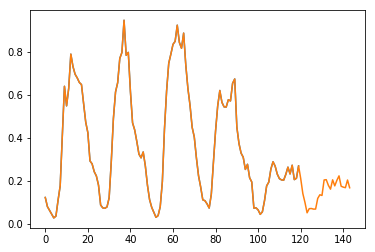

(20, 24) (20, 24) (6, 24) (6, 24)


In [4]:
# %% prepare data
feature_id = 153
train_size = time_steps * 7 * 3
test_size = time_steps * 7 * 1
train, test = dataset[:train_size,
                      feature_id], dataset[-test_size:, feature_id]
print train.shape, test.shape

trainX, trainY = train[:-time_steps], train[time_steps:]
testX, testY = test[:-time_steps], test[time_steps:]
print trainX.shape, trainY.shape, testX.shape, testY.shape

# plot and validate
pyplot.plot(testX[time_steps:])
pyplot.plot(testY)
pyplot.show()

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (-1, time_steps))
trainY = numpy.reshape(trainY, (-1, time_steps))
testX = numpy.reshape(testX, (-1, time_steps))
testY = numpy.reshape(testY, (-1, time_steps))
print trainX.shape, trainY.shape, testX.shape, testY.shape

In [ ]:
# %% define the model
model = Sequential()
model.add(Dense(8, input_dim=time_steps, activation='relu'))
model.add(Dense(time_steps))
print(model.summary())

model.compile(loss='mae', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2)

# evaluate model
loss = model.evaluate(testX, testY, verbose=0)
print('MAE: %f' % loss)

(144,)


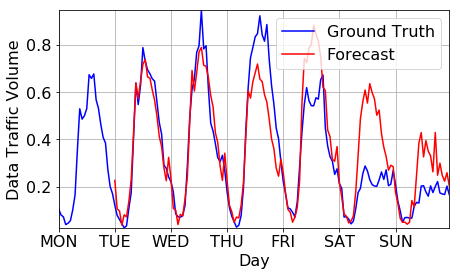

In [18]:
WEEKDAYS = ['MON','TUE','WED','THU','FRI','SAT','SUN']
# %% predict and plot
testYhat = model.predict(testX, verbose=0).reshape(time_steps * 6)
print testYhat.shape
# feature_id = randint(0, feature_size)

fig = pyplot.figure(figsize=[7, 4])
matplotlib.rc('font', size=16)
pyplot.plot(test, 'b', label='Ground Truth')

data = numpy.empty(test_size)
data[time_steps:] = testYhat
data[:time_steps] = numpy.nan
pyplot.plot(data, 'r', label='Forecast')
pyplot.xlabel('Day')
pyplot.xticks(numpy.arange(0, 24*7, 24),WEEKDAYS)
pyplot.ylabel('Data Traffic Volume')
pyplot.ylim([0, 1])
pyplot.legend()
pyplot.grid()
pyplot.autoscale(tight=True)
pyplot.show()